In [1]:
import pandas as pd
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

from pprint import pprint
pd.set_option('display.width', None)
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
def drop_by_index(X,indexes):
    """
    helper function to drop rows of dataframe and return new dataframe without those rows with indexes resetted
    """
    X = X.drop(indexes)
    X = X.reset_index().drop(columns="index")
    return(X)

def build_surv_obj(survival_type, ):
    
    #Add in filter by option param logic here:
    #
    #
    #
    
    Time_df = clinical.loc[:,[survival_type + "_days"]]
    Time_df[survival_type + "_years"] = Time_df[survival_type + "_days"]/365.25
    Time_df["status"] = True
    Time_df.head()

    return SurvivalData(time= (survival_type+ "_years"), status="status", data=Time_df)

### Data Processing

In [3]:
clinical = pd.read_pickle("C:\\SMU_v2\\clinical_output.pkl").reset_index().drop(columns="index")
to_drop = clinical[clinical['dx_date']=="NA"].index
clinical = drop_by_index(clinical,to_drop)

clinical.drop(columns=['NRIC','dob',\
                       'Count_as_DFS','Count_as_OS','Count_as_CSS'],inplace = True)

# drop all rows where dates are null
    # wave 1 details
clinical.dropna(axis=0, \
                subset=['Date_for_DFS','Date_for_OS','Date_for_CSS','dx_date',\
                        'size_precise', 'nodespos'],\
                inplace=True)
# wave 2 details


# convert all datetime in dataframe into dateime format for processing
clinical["Date_for_DFS"] = pd.to_datetime(clinical["Date_for_DFS"])
clinical["Date_for_OS"] = pd.to_datetime(clinical["Date_for_OS"])
clinical["Date_for_CSS"] = pd.to_datetime(clinical["Date_for_CSS"])
clinical["dx_date"] = pd.to_datetime(clinical["dx_date"])
clinical['last_seen']= pd.to_datetime(clinical["dx_date"])


# calculate in days
clinical["DFS_days"] = (clinical["Date_for_DFS"] - clinical['dx_date'] )/np.timedelta64(1, 'D')
clinical["OS_days"] = (clinical["Date_for_OS"] - clinical['dx_date'] )/np.timedelta64(1, 'D')
clinical["CSS_days"] = (clinical["Date_for_CSS"] - clinical['dx_date'] )/np.timedelta64(1, 'D')

# alive or dead
clinical['status'] = np.where(clinical['death_age'].isnull(), False, True)

In [4]:
# clinical.describe()
# clinical.to_csv("C:\\Users\\LINGXING\\Desktop\\clinical.csv",index = False)

### Kaplan Meier Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="colorblind", color_codes=True)

from survive import datasets
from survive import SurvivalData
from survive import KaplanMeier, Breslow, NelsonAalen

Overall Survival Modeling

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')


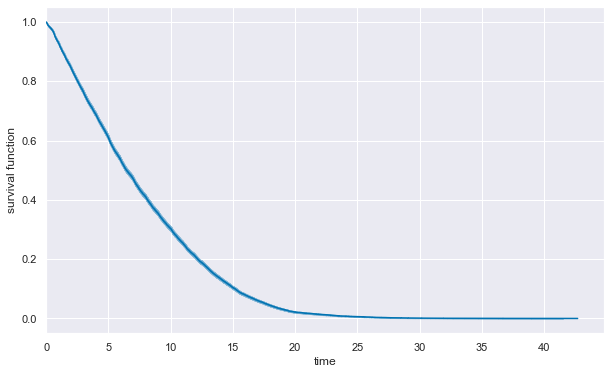

In [6]:
#Build Input DF
surv = build_surv_obj(survival_type="OS")
OS_km = KaplanMeier()
OS_km.fit(surv)
# print(OS_km.summary)
print(OS_km)


#Plot Curve
plt.figure(figsize=(10, 6))
OS_km.plot()
plt.show()
plt.close()

Disease Free Survival

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')


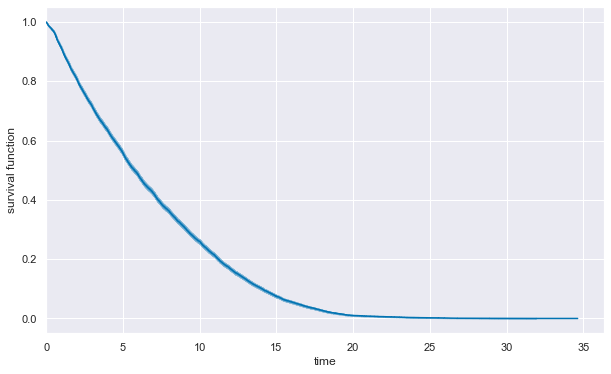

In [7]:
#Build Input DF
surv = build_surv_obj(survival_type="DFS")
DFS_km = KaplanMeier()
DFS_km.fit(surv)
# print(DFS_km.summary)
print(DFS_km)

#Plot curve
plt.figure(figsize=(10, 6))
DFS_km.plot()
plt.show()
plt.close()

Cancer Specific Survival

KaplanMeier(conf_level=0.95, conf_type='log-log', n_boot=500,
            random_state=None, tie_break='discrete', var_type='greenwood')


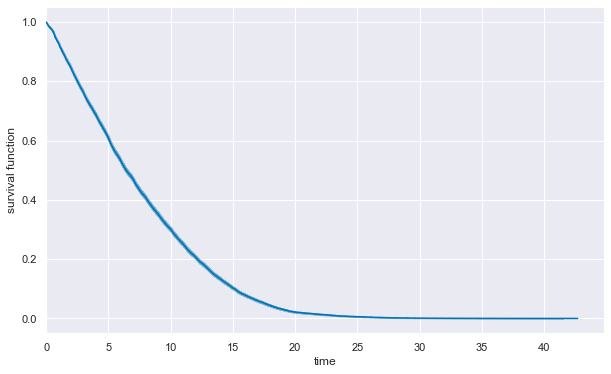

In [8]:
#Build Input DF
surv = build_surv_obj(survival_type="CSS")
CSS_km = KaplanMeier()
CSS_km.fit(surv)
# print(CSS_km.summary)
print(CSS_km)

#Plot curve
plt.figure(figsize=(10, 6))
CSS_km.plot()
plt.show()
plt.close()